In [1]:
# This code just limits the gpu usage till 60% ...otherwise you will get memory error
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
def load_data(dataset_path):
    with open(dataset_path, "r") as fi :
        data = json.load(fi)
        
    # convert list into numpy array bcoz labels and mfccs are stored into lists
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])
    
    return inputs,targets

In [4]:
inputs, targets = load_data('data.json')

In [5]:
inputs.shape, targets.shape

((100, 130, 13), (100,))

In [6]:
# create train/validation/test data
# build CNN
# train the CNN
# evaluate the CNN on test set
# make prediction on sample

In [7]:
X, y = load_data('data.json')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

# now expand the dimensions bcoz CNN takes 4D tensors 
# X_train = X_train[..., np.newaxis] # 4d array -> (num_samples, 130, 13, 1)
# X_validation = X_validation[..., np.newaxis]
# X_test = X_test[..., np.newaxis] 

In [8]:
X_train.shape, X_validation.shape, X_test.shape

((60, 130, 13), (15, 130, 13), (25, 130, 13))

# Building the model architecture

In [9]:
model = tf.keras.Sequential([
    
    tf.keras.layers.LSTM(64, input_shape = (X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(10, activation='softmax')   
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 130, 64)           19968     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________


In [39]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss = "sparse_categorical_crossentropy",
              metrics = ['accuracy'])
hist = model.fit(X_train, y_train,
          validation_data=(X_validation,y_validation),
          batch_size=16,
          epochs=100)

test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on the test set is {}".format(test_accuracy))

Train on 60 samples, validate on 15 samples
Epoch 1/100
60/60 [==============================] - 3s 47ms/sample - loss: 0.3149 - accuracy: 0.9833 - val_loss: 0.7724 - val_accuracy: 0.8000
Epoch 2/100
60/60 [==============================] - 0s 994us/sample - loss: 0.3045 - accuracy: 0.9833 - val_loss: 0.7700 - val_accuracy: 0.8000
Epoch 3/100
60/60 [==============================] - 0s 959us/sample - loss: 0.2272 - accuracy: 1.0000 - val_loss: 0.7645 - val_accuracy: 0.8000
Epoch 4/100
60/60 [==============================] - 0s 864us/sample - loss: 0.2336 - accuracy: 0.9833 - val_loss: 0.7580 - val_accuracy: 0.8000
Epoch 5/100
60/60 [==============================] - 0s 863us/sample - loss: 0.2267 - accuracy: 1.0000 - val_loss: 0.7360 - val_accuracy: 0.8000
Epoch 6/100
60/60 [==============================] - 0s 879us/sample - loss: 0.2468 - accuracy: 1.0000 - val_loss: 0.6913 - val_accuracy: 0.8000
Epoch 7/100
60/60 [==============================] - 0s 887us/sample - loss: 0.2253 - a

Epoch 57/100
60/60 [==============================] - 0s 802us/sample - loss: 0.0498 - accuracy: 1.0000 - val_loss: 0.8706 - val_accuracy: 0.7333
Epoch 58/100
60/60 [==============================] - 0s 829us/sample - loss: 0.0748 - accuracy: 1.0000 - val_loss: 0.8713 - val_accuracy: 0.7333
Epoch 59/100
60/60 [==============================] - 0s 796us/sample - loss: 0.0570 - accuracy: 1.0000 - val_loss: 0.9845 - val_accuracy: 0.7333
Epoch 60/100
60/60 [==============================] - 0s 803us/sample - loss: 0.0749 - accuracy: 1.0000 - val_loss: 0.9923 - val_accuracy: 0.7333
Epoch 61/100
60/60 [==============================] - 0s 812us/sample - loss: 0.0725 - accuracy: 1.0000 - val_loss: 0.9948 - val_accuracy: 0.7333
Epoch 62/100
60/60 [==============================] - 0s 804us/sample - loss: 0.0688 - accuracy: 1.0000 - val_loss: 0.8549 - val_accuracy: 0.7333
Epoch 63/100
60/60 [==============================] - 0s 780us/sample - loss: 0.0592 - accuracy: 1.0000 - val_loss: 0.8607 -

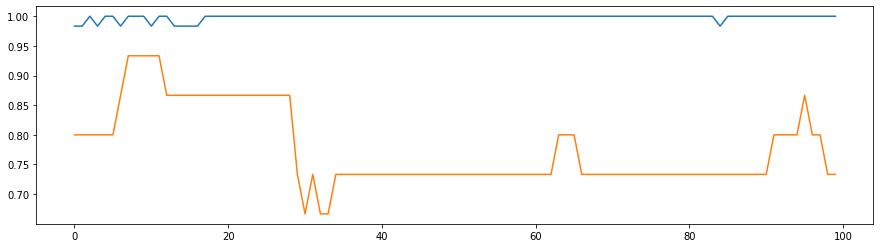

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,4))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

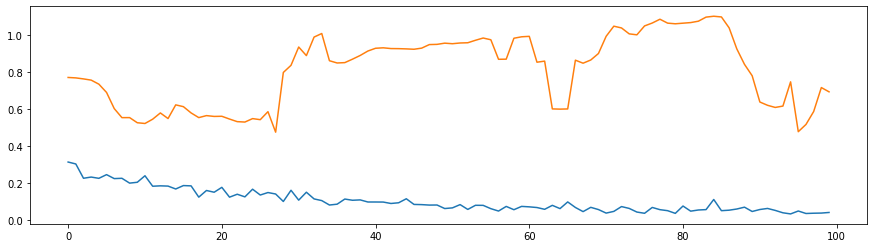

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,4))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()